- 데이터 출처 : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
- 연령대, 결혼여부, 최종학력, 소득수준 등 다양한 요소를 바탕으로 고객 이탈 예측

# 문제 정의

# 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [2]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [3]:
df = pd.read_csv("/Users/tiffany/Downloads/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Client number
- Unique identifier for the customer holding the account

In [4]:
# Client number. Unique identifier for the customer holding the account
df['CLIENTNUM'].value_counts()

CLIENTNUM
768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: count, Length: 10127, dtype: int64

## Attrition_Flag
- Internal event (customer activity) variable
- if the account is closed then 1 else 0
- 이탈 고객 적음


In [5]:
# Internal event (customer activity) variable - if the account is closed then 1 else 0 : 이탈 고객 적음
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

## Customer's Age in Years

In [6]:
# Demographic variable - Customer's Age in Years
df['Customer_Age'].value_counts().reset_index().sort_values(by='Customer_Age')

,Customer_Age,count
33,26,78
38,27,32
39,28,29
36,29,56
34,30,70
32,31,91
28,32,106
26,33,127
25,34,146
22,35,184


<Axes: >

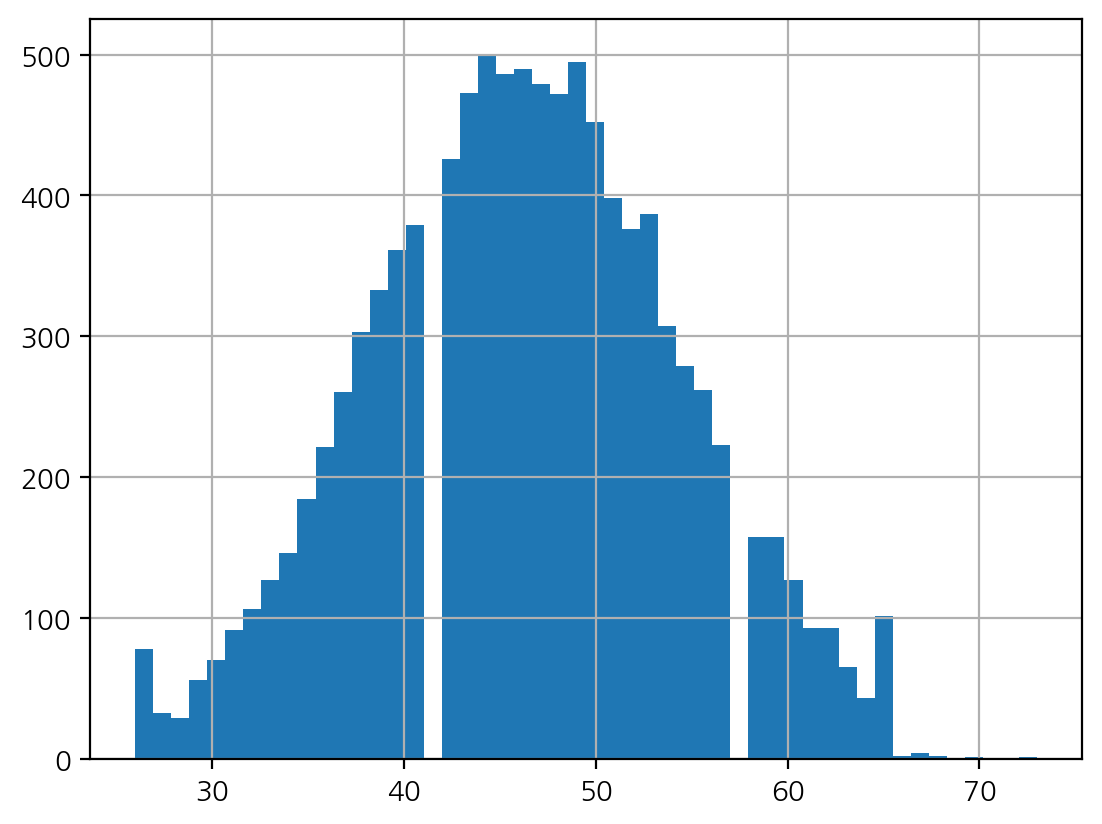

In [7]:
df['Customer_Age'].hist(bins=50)

## Gender
- M=Male, F=Female
- 여자가 좀 더 많네?


In [8]:
# Demographic variable - M=Male, F=Female : 여자가 좀 더 많네?
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

## Number of dependents
- 부양 가족 수


In [9]:
# Demographic variable - Number of dependents : 부양 가족 수
Dependent = df['Dependent_count'].value_counts().reset_index().sort_values(by='Dependent_count')
Dependent

,Dependent_count,count
4,0,904
2,1,1838
1,2,2655
0,3,2732
3,4,1574
5,5,424


<Axes: xlabel='Dependent_count'>

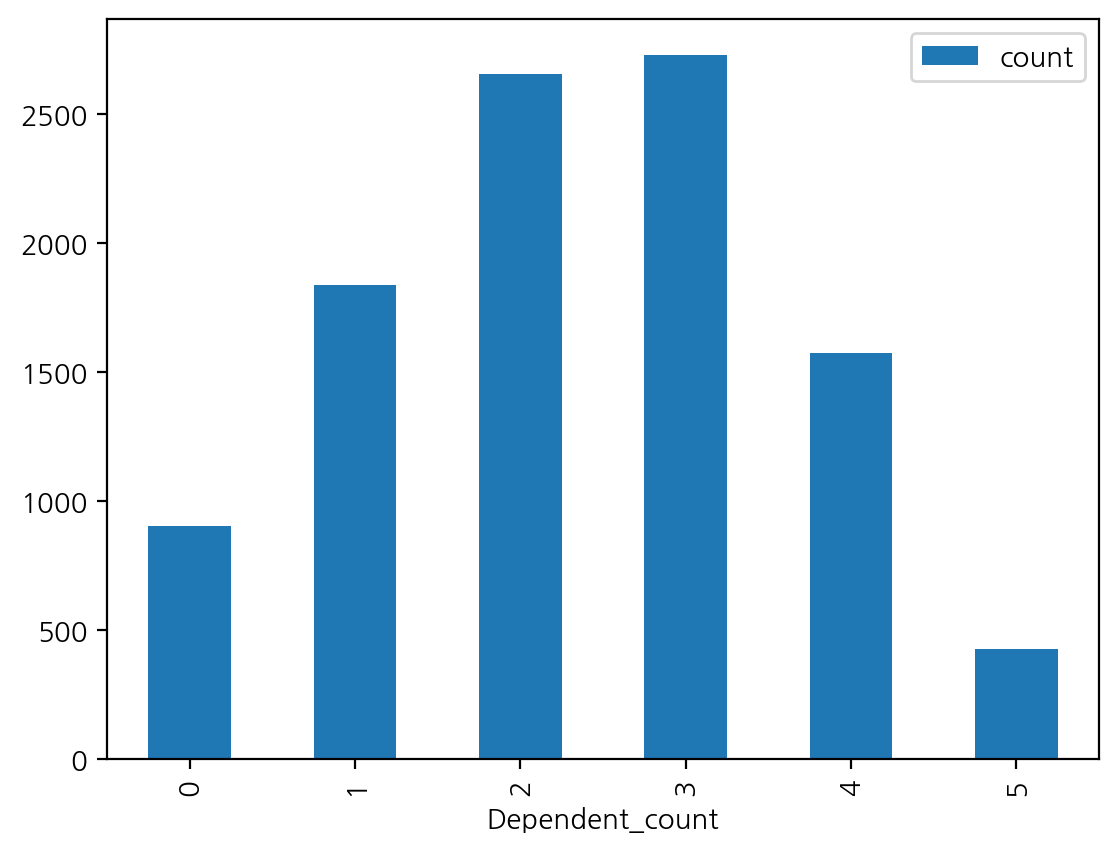

In [10]:
Dependent.plot(kind='bar', x='Dependent_count')

## Education_Level
- Educational Qualification of the account holder


In [11]:
# Demographic variable - Educational Qualification of the account holder
Education = df['Education_Level'].value_counts().reset_index()
Education

,Education_Level,count
0,Graduate,3128
1,High School,2013
2,Unknown,1519
3,Uneducated,1487
4,College,1013
5,Post-Graduate,516
6,Doctorate,451


In [12]:
Education['Education_Level'].unique()

array(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

- 학력 수준 순서대로 나열 -> 숫자로 변경?
    - Unknown
    - Uneducated
    - High School
    - College
    - Graduate
    - Post-Graduate
    - Doctorate

## Marital_Status
- Married, Single, Divorced, Unknown


In [13]:
# Demographic variable - Married, Single, Divorced, Unknown
df['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

## Income_Category
- Annual Income Category of the account holder 

In [14]:
# Annual Income Category of the account holder 
Income = df['Income_Category'].value_counts().reset_index()
Income

,Income_Category,count
0,Less than $40K,3561
1,$40K - $60K,1790
2,$80K - $120K,1535
3,$60K - $80K,1402
4,Unknown,1112
5,$120K +,727


In [15]:
Income['Income_Category'].unique()

array(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       'Unknown', '$120K +'], dtype=object)

<Axes: xlabel='Income_Category', ylabel='count'>

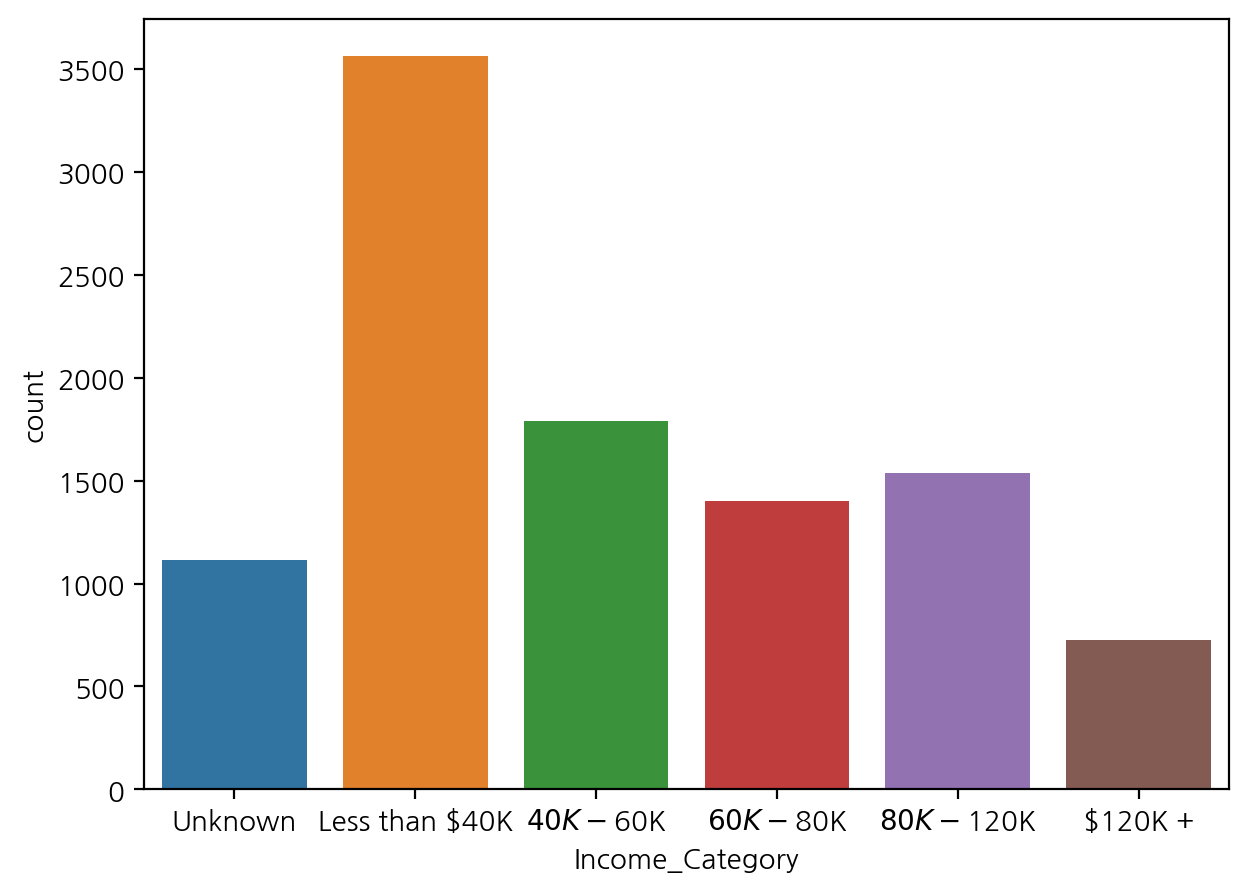

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(data=Income, x='Income_Category', y='count',
            order = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K","$120K +"])

## Card_Category

In [17]:
# Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

## Months_on_book
- Period of relationship with bank

In [18]:
# Period of relationship with bank
df['Months_on_book'].value_counts().reset_index().sort_values(by='Months_on_book').head()

,Months_on_book,count
34,13,70
43,14,16
41,15,34
42,16,29
40,17,39


<Axes: >

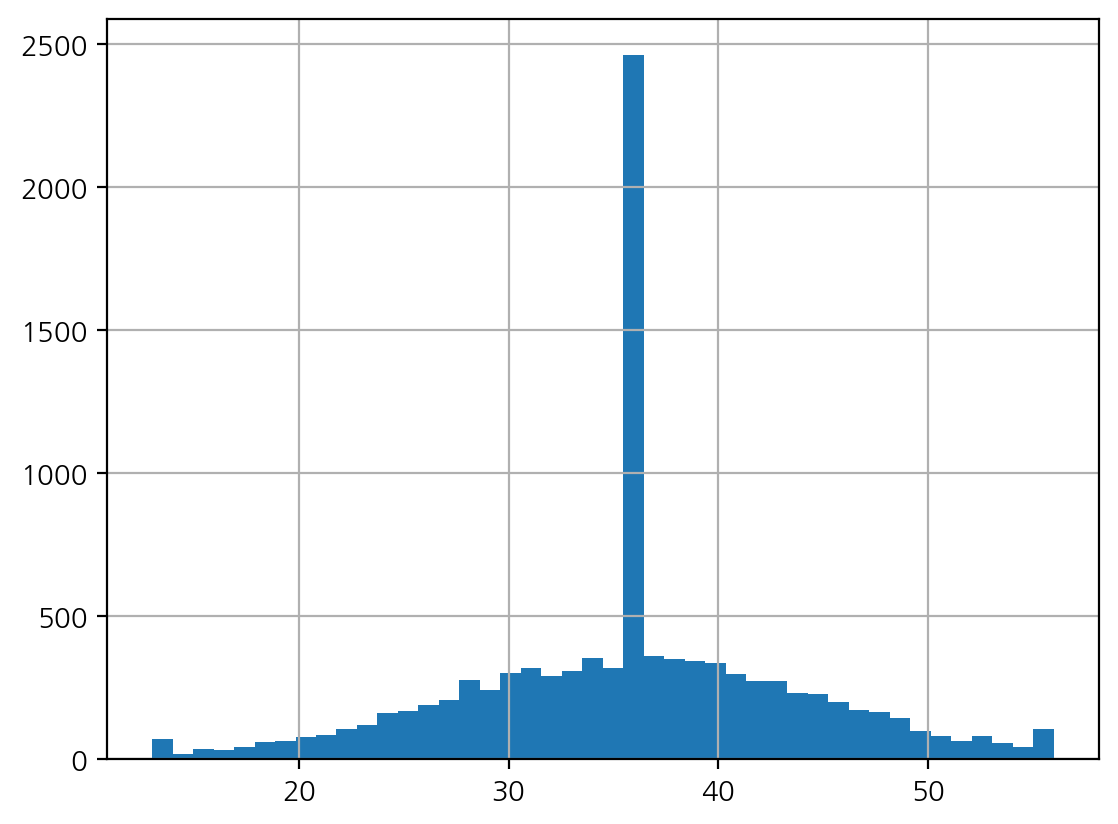

In [19]:
df['Months_on_book'].hist(bins=df['Months_on_book'].nunique())

## Total_Relationship_Count
- Total no. of products held by the customer

In [20]:
df['Total_Relationship_Count'].value_counts()

Total_Relationship_Count
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: count, dtype: int64

<Axes: >

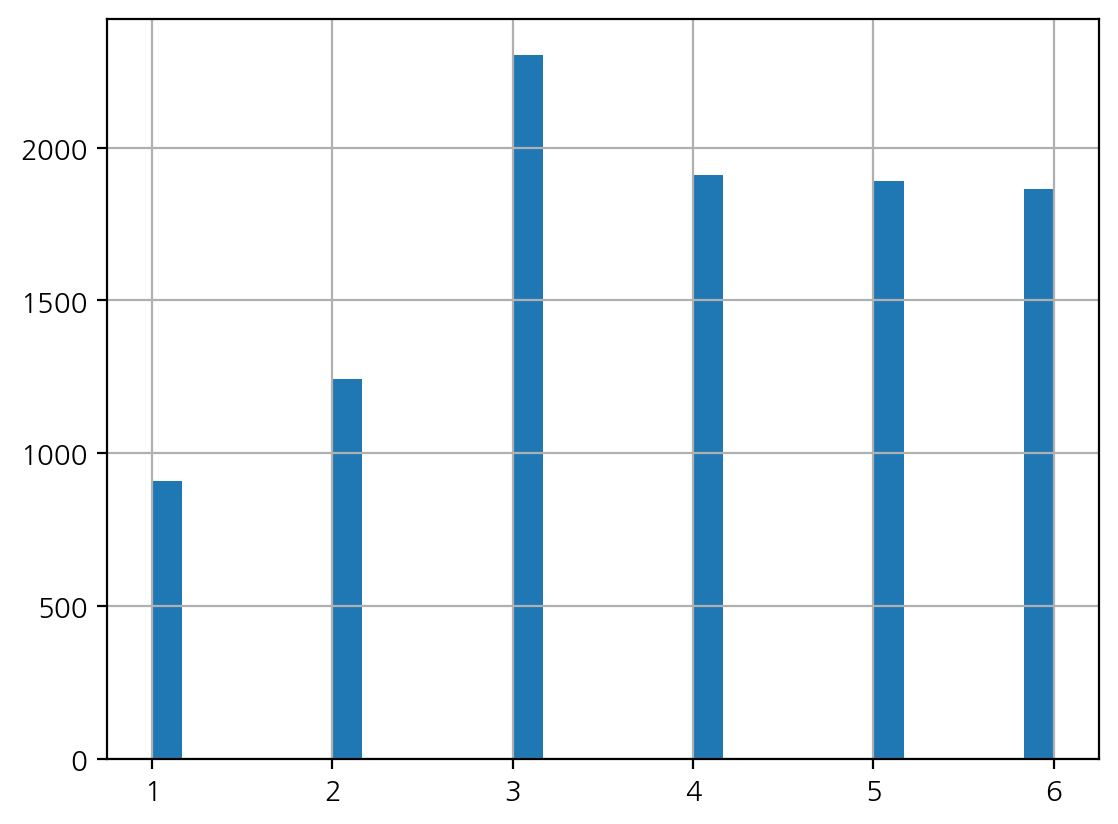

In [21]:
df['Total_Relationship_Count'].hist(bins=30)

## Months_Inactive_12_mon
- No. of months inactive in the last 12 months

Months_Inactive_12_mon
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64


<Axes: >

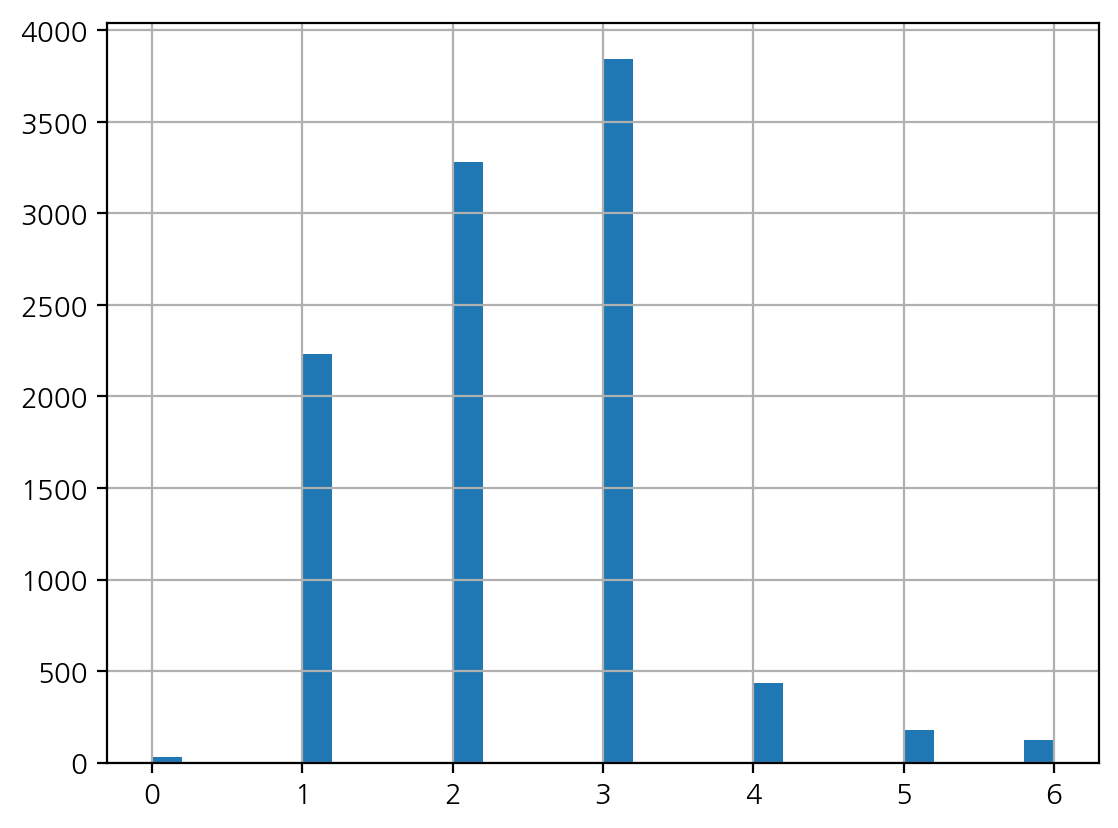

In [22]:
print(df['Months_Inactive_12_mon'].value_counts())
df['Months_Inactive_12_mon'].hist(bins=30)

## Contacts_Count_12_mon
- No. of Contacts in the last 12 months

Contacts_Count_12_mon
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: count, dtype: int64


<Axes: >

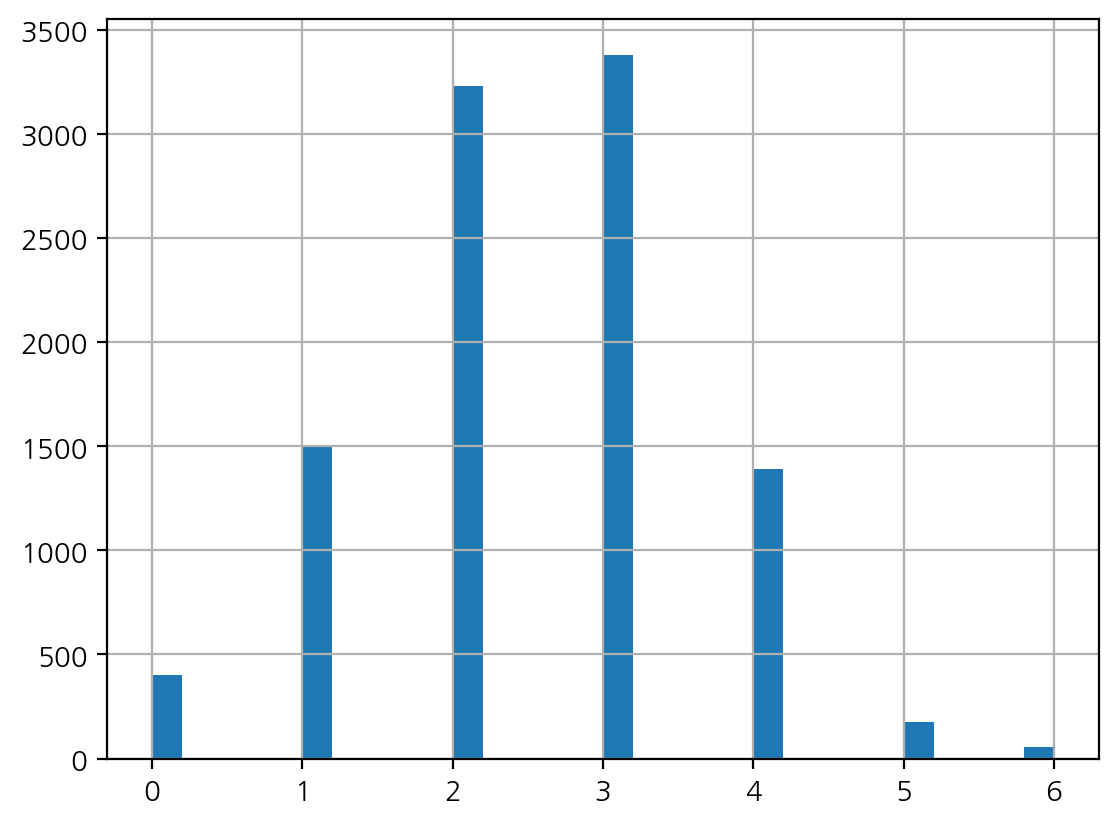

In [23]:
print(df['Contacts_Count_12_mon'].value_counts())
df['Contacts_Count_12_mon'].hist(bins=30)

## Credit_Limit
- Credit Limit on the Credit Card
- 신용한도
- 여기까지 지출할 수 있어!


Credit_Limit
34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: count, Length: 6205, dtype: int64


<Axes: >

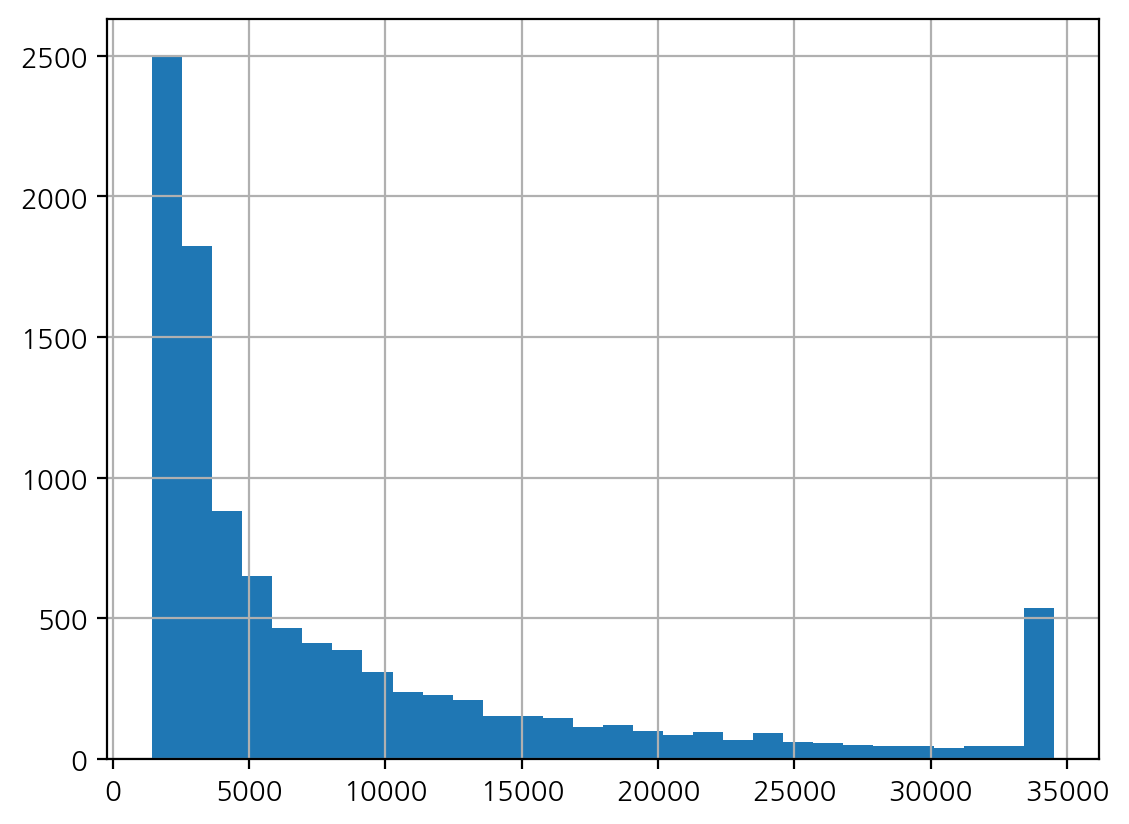

In [24]:
print(df['Credit_Limit'].value_counts())
df['Credit_Limit'].hist(bins=30)

## Total_Revolving_Bal
- Total Revolving Balance on the Credit Card 
- 다음달로 이월되는 잔액

Total_Revolving_Bal
0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: count, Length: 1974, dtype: int64


<Axes: >

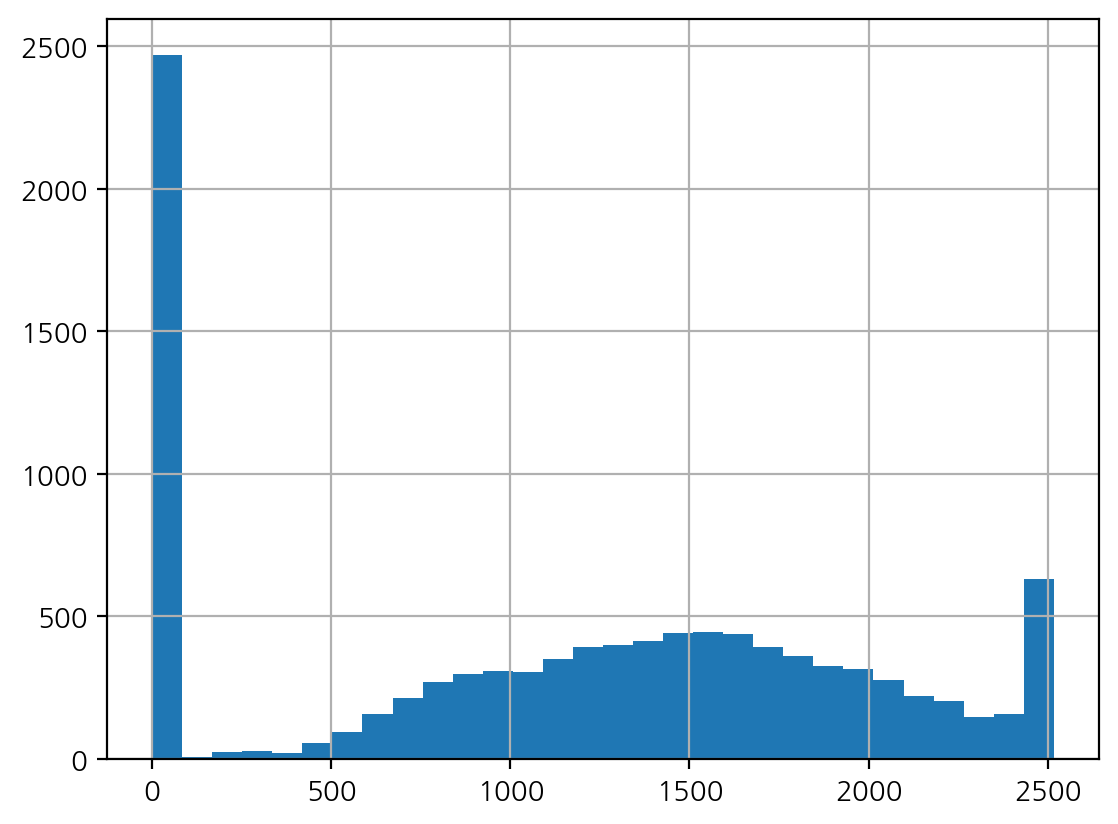

In [25]:
print(df['Total_Revolving_Bal'].value_counts())
df['Total_Revolving_Bal'].hist(bins=30)

## Avg_Open_To_Buy
- Open to Buy Credit Line (Average of last 12 months)
- for any Open Account on any Business Day, the excess of (i) the Credit Limit and (b) the amount of Receivables in such Account.
- 해당 계정의 신용 한도 및 미수금 금액 초과 -> 그래서 한도초과한 금액이 적은 게 많겠지

Avg_Open_To_Buy
1438.3     324
34516.0     98
31999.0     26
787.0        8
701.0        7
          ... 
6543.0       1
2808.0       1
21549.0      1
6189.0       1
8427.0       1
Name: count, Length: 6813, dtype: int64


<Axes: >

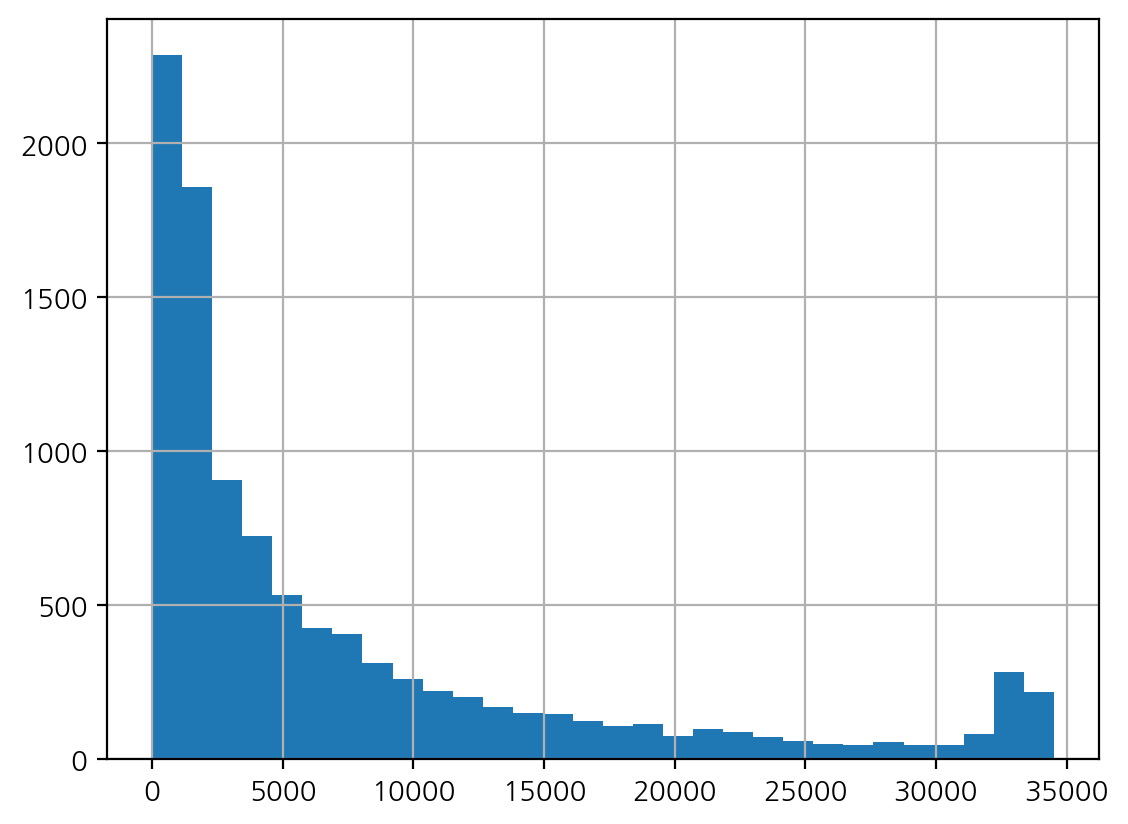

In [26]:
print(df['Avg_Open_To_Buy'].value_counts())
df['Avg_Open_To_Buy'].hist(bins=30)

## Total_Amt_Chng_Q4_Q1
- Change in Transaction Amount (Q4 over Q1)
- 거래금액 변동(1분기 대비 4분기)



Total_Amt_Chng_Q4_Q1
0.791    36
0.712    34
0.743    34
0.718    33
0.735    33
         ..
1.216     1
1.645     1
1.089     1
2.103     1
0.166     1
Name: count, Length: 1158, dtype: int64


<Axes: >

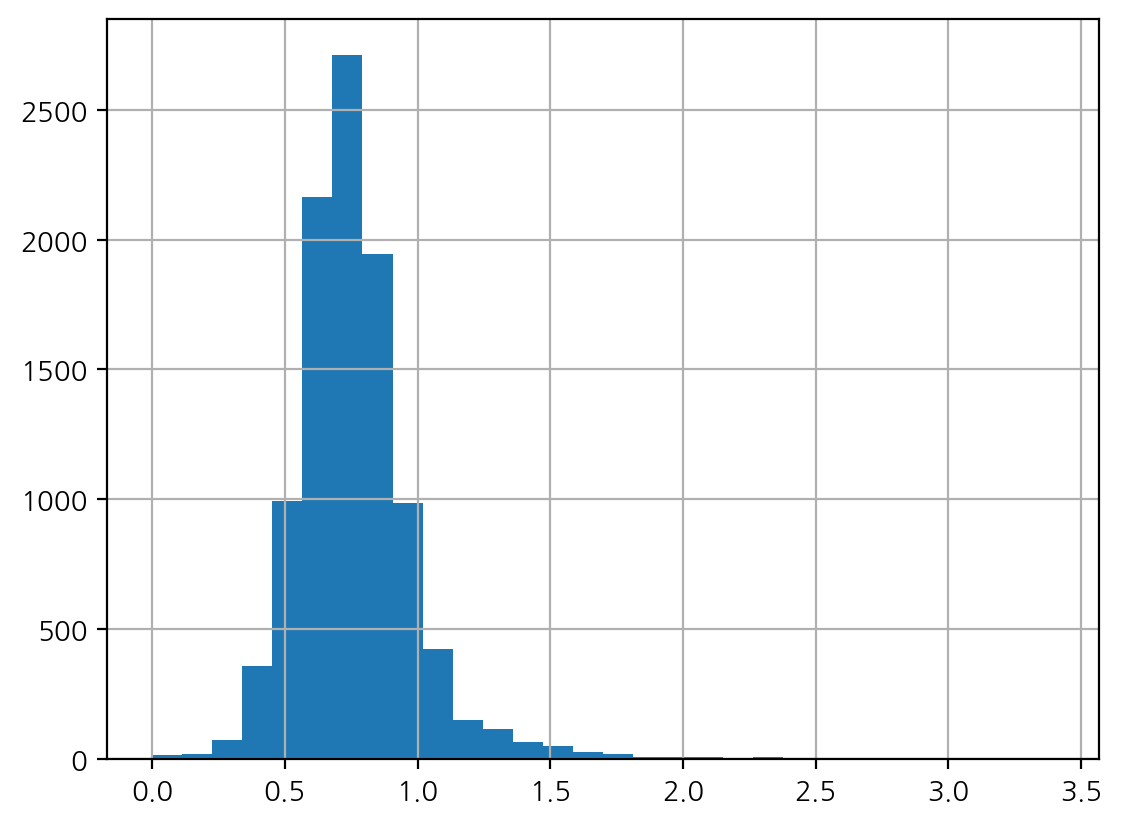

In [27]:
# 전반적으로 거래금액이 줄은 것 같아
print(df['Total_Amt_Chng_Q4_Q1'].value_counts())
df['Total_Amt_Chng_Q4_Q1'].hist(bins=30)

## Total_Trans_Amt
- Total Transaction Amount (Last 12 months)

Total_Trans_Amt
4253     11
4509     11
4518     10
2229     10
4220      9
         ..
1274      1
4521      1
3231      1
4394      1
10294     1
Name: count, Length: 5033, dtype: int64


<Axes: >

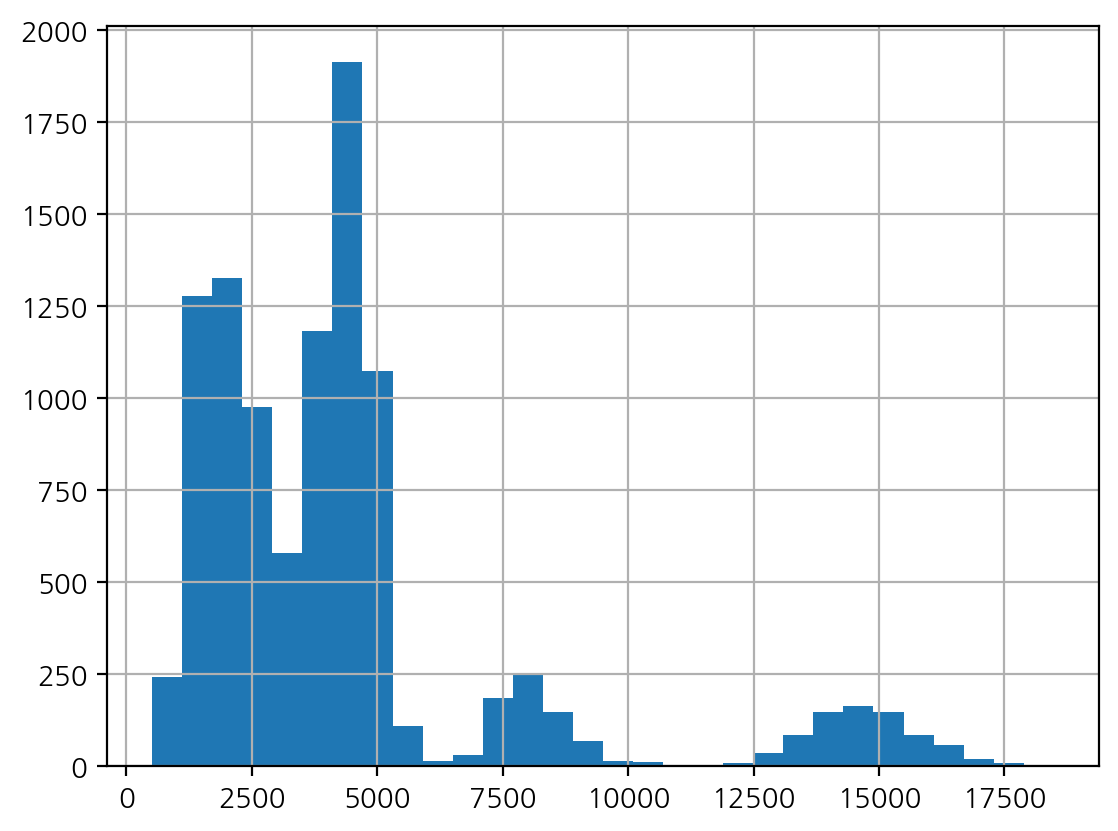

In [28]:
# 지난 1년간 거래 양
print(df['Total_Trans_Amt'].value_counts())
df['Total_Trans_Amt'].hist(bins=30)

## Total_Trans_Ct
- Total Transaction Count (Last 12 months)

Total_Trans_Ct
81     208
71     203
75     203
69     202
82     202
      ... 
11       2
134      1
139      1
138      1
132      1
Name: count, Length: 126, dtype: int64


<Axes: >

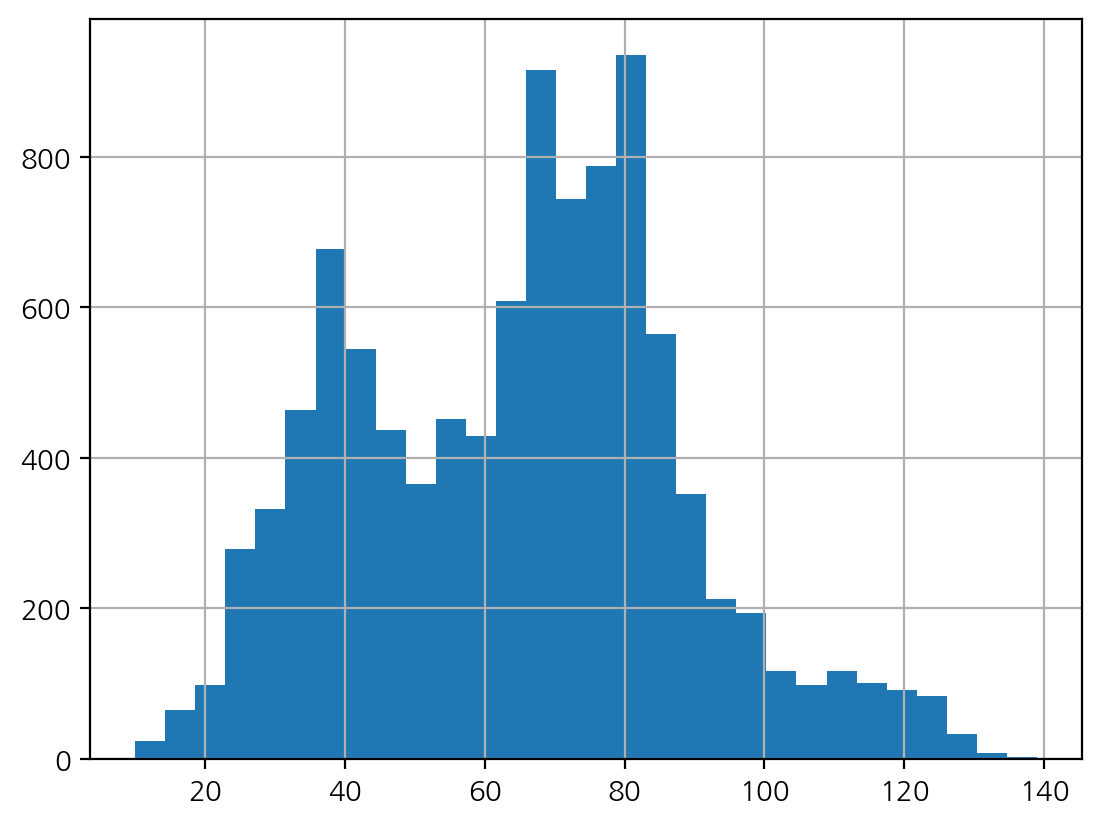

In [29]:
# 지난 1년간 거래 양
print(df['Total_Trans_Ct'].value_counts())
df['Total_Trans_Ct'].hist(bins=30)

## Total_Ct_Chng_Q4_Q1
- Change in Transaction Count (Q4 over Q1)

Total_Ct_Chng_Q4_Q1
0.667    171
1.000    166
0.500    161
0.750    156
0.600    113
        ... 
0.827      1
0.343      1
1.579      1
0.125      1
0.359      1
Name: count, Length: 830, dtype: int64


<Axes: >

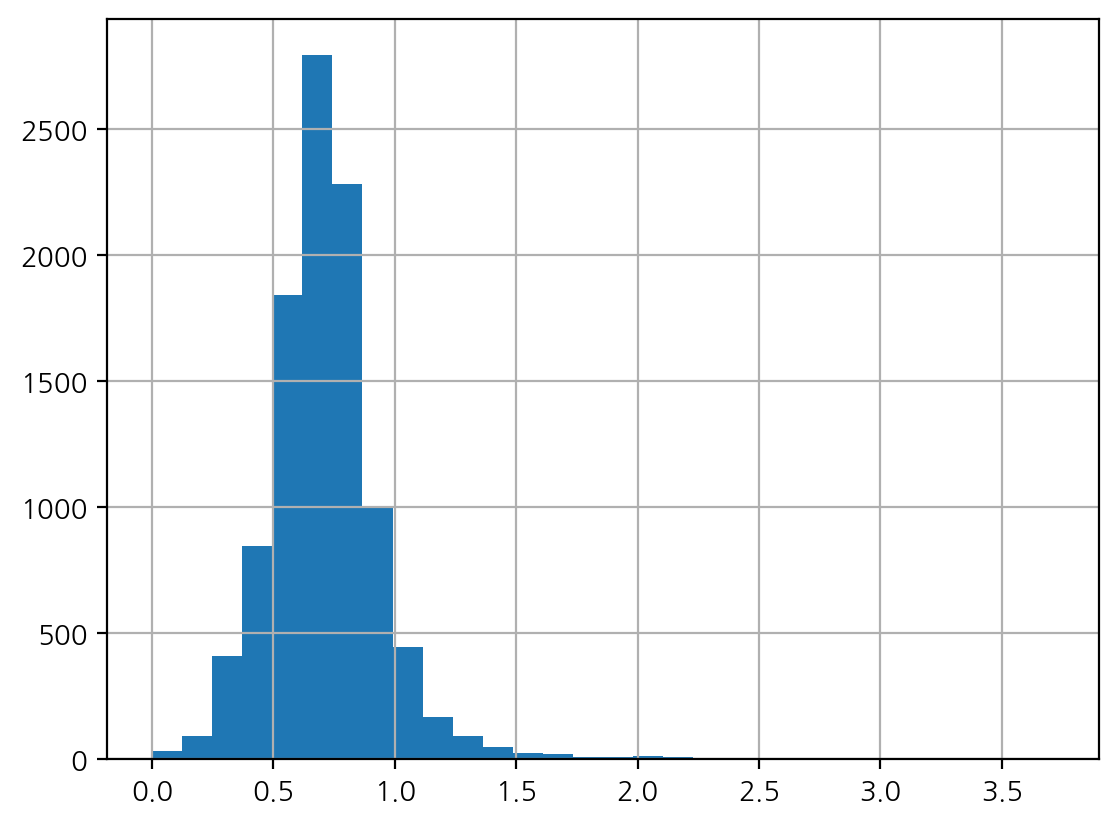

In [30]:
# 지난 1년간 거래 양
print(df['Total_Ct_Chng_Q4_Q1'].value_counts())
df['Total_Ct_Chng_Q4_Q1'].hist(bins=30)

## Avg_Utilization_Ratio
- Average Card Utilization Ratio
- Credit utilization is calculated by dividing the balance by credit limit for each card and for all cards together.
- 신용이용률은 잔액을 카드별, 전체 카드별 신용한도로 나누어 계산합니다.

Avg_Utilization_Ratio
0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.927       1
0.935       1
0.954       1
0.385       1
0.009       1
Name: count, Length: 964, dtype: int64


<Axes: >

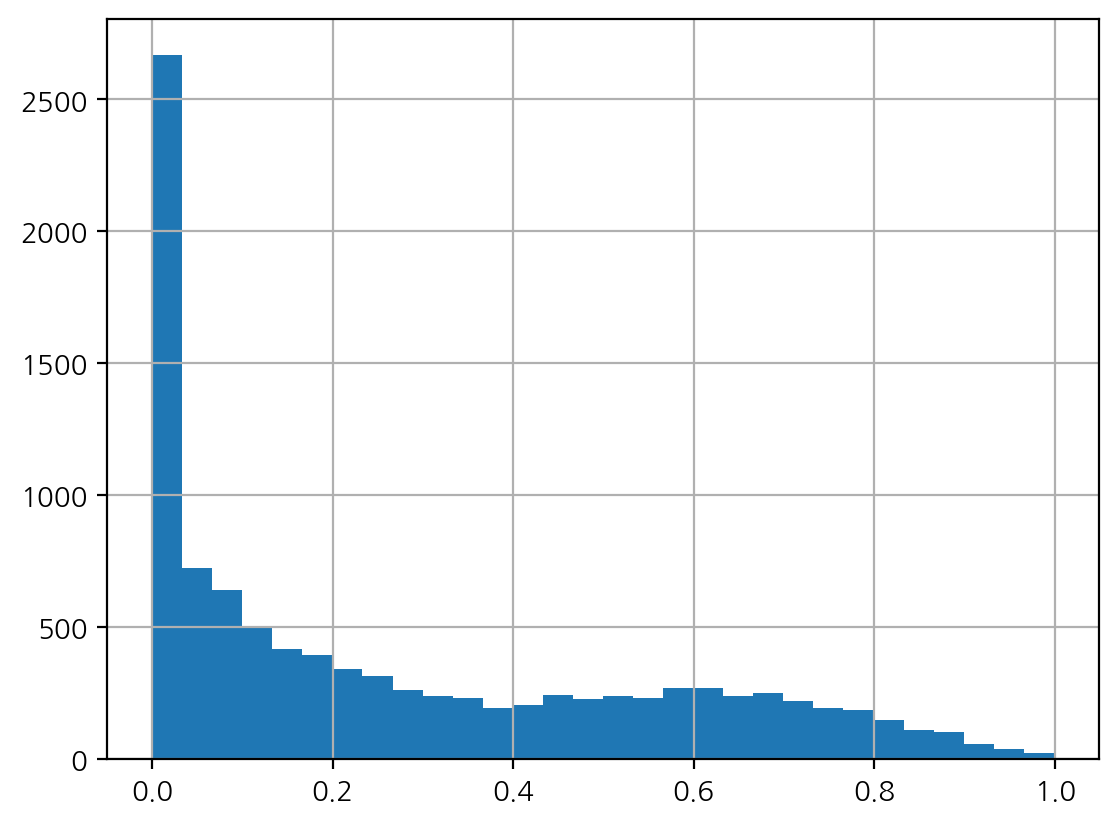

In [31]:
print(df['Avg_Utilization_Ratio'].value_counts())
df['Avg_Utilization_Ratio'].hist(bins=30)

## Naive_Bayes_Classifier_Attrition ~
```
"Naive Bayes Classifier"를 사용하여 
"Attrition_Flag", "Card_Category", "Contacts_Count_12_mon", "Dependent_count", "Education_Level", "Months_Inactive_12_mon" 등의 특성을 이용한 분류 작업을 수행한다는 것으로 이해하겠습니다.

나이브 베이즈 분류기는 각 특성이 독립적이라고 가정하고, 
주어진 입력에 대한 클래스의 조건부 확률을 계산하여 예측을 수행하는 모델입니다. 
이 모델은 텍스트 분류, 스팸 필터링, 감정 분석, 간단한 분류 작업 등 다양한 분야에서 사용됩니다.

위에서 언급한 특성들은 고객 이탈 여부(Attrition_Flag), 카드 카테고리(Card_Category), 연간 연락 횟수(Contacts_Count_12_mon), 부양 가족 수(Dependent_count), 교육 수준(Education_Level), 12개월 동안 비활성 기간(Months_Inactive_12_mon) 등으로 보입니다.
```

# Naive_Bayes 컬럼 삭제

In [32]:
drop_col = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
             
df = df.drop(columns=drop_col)

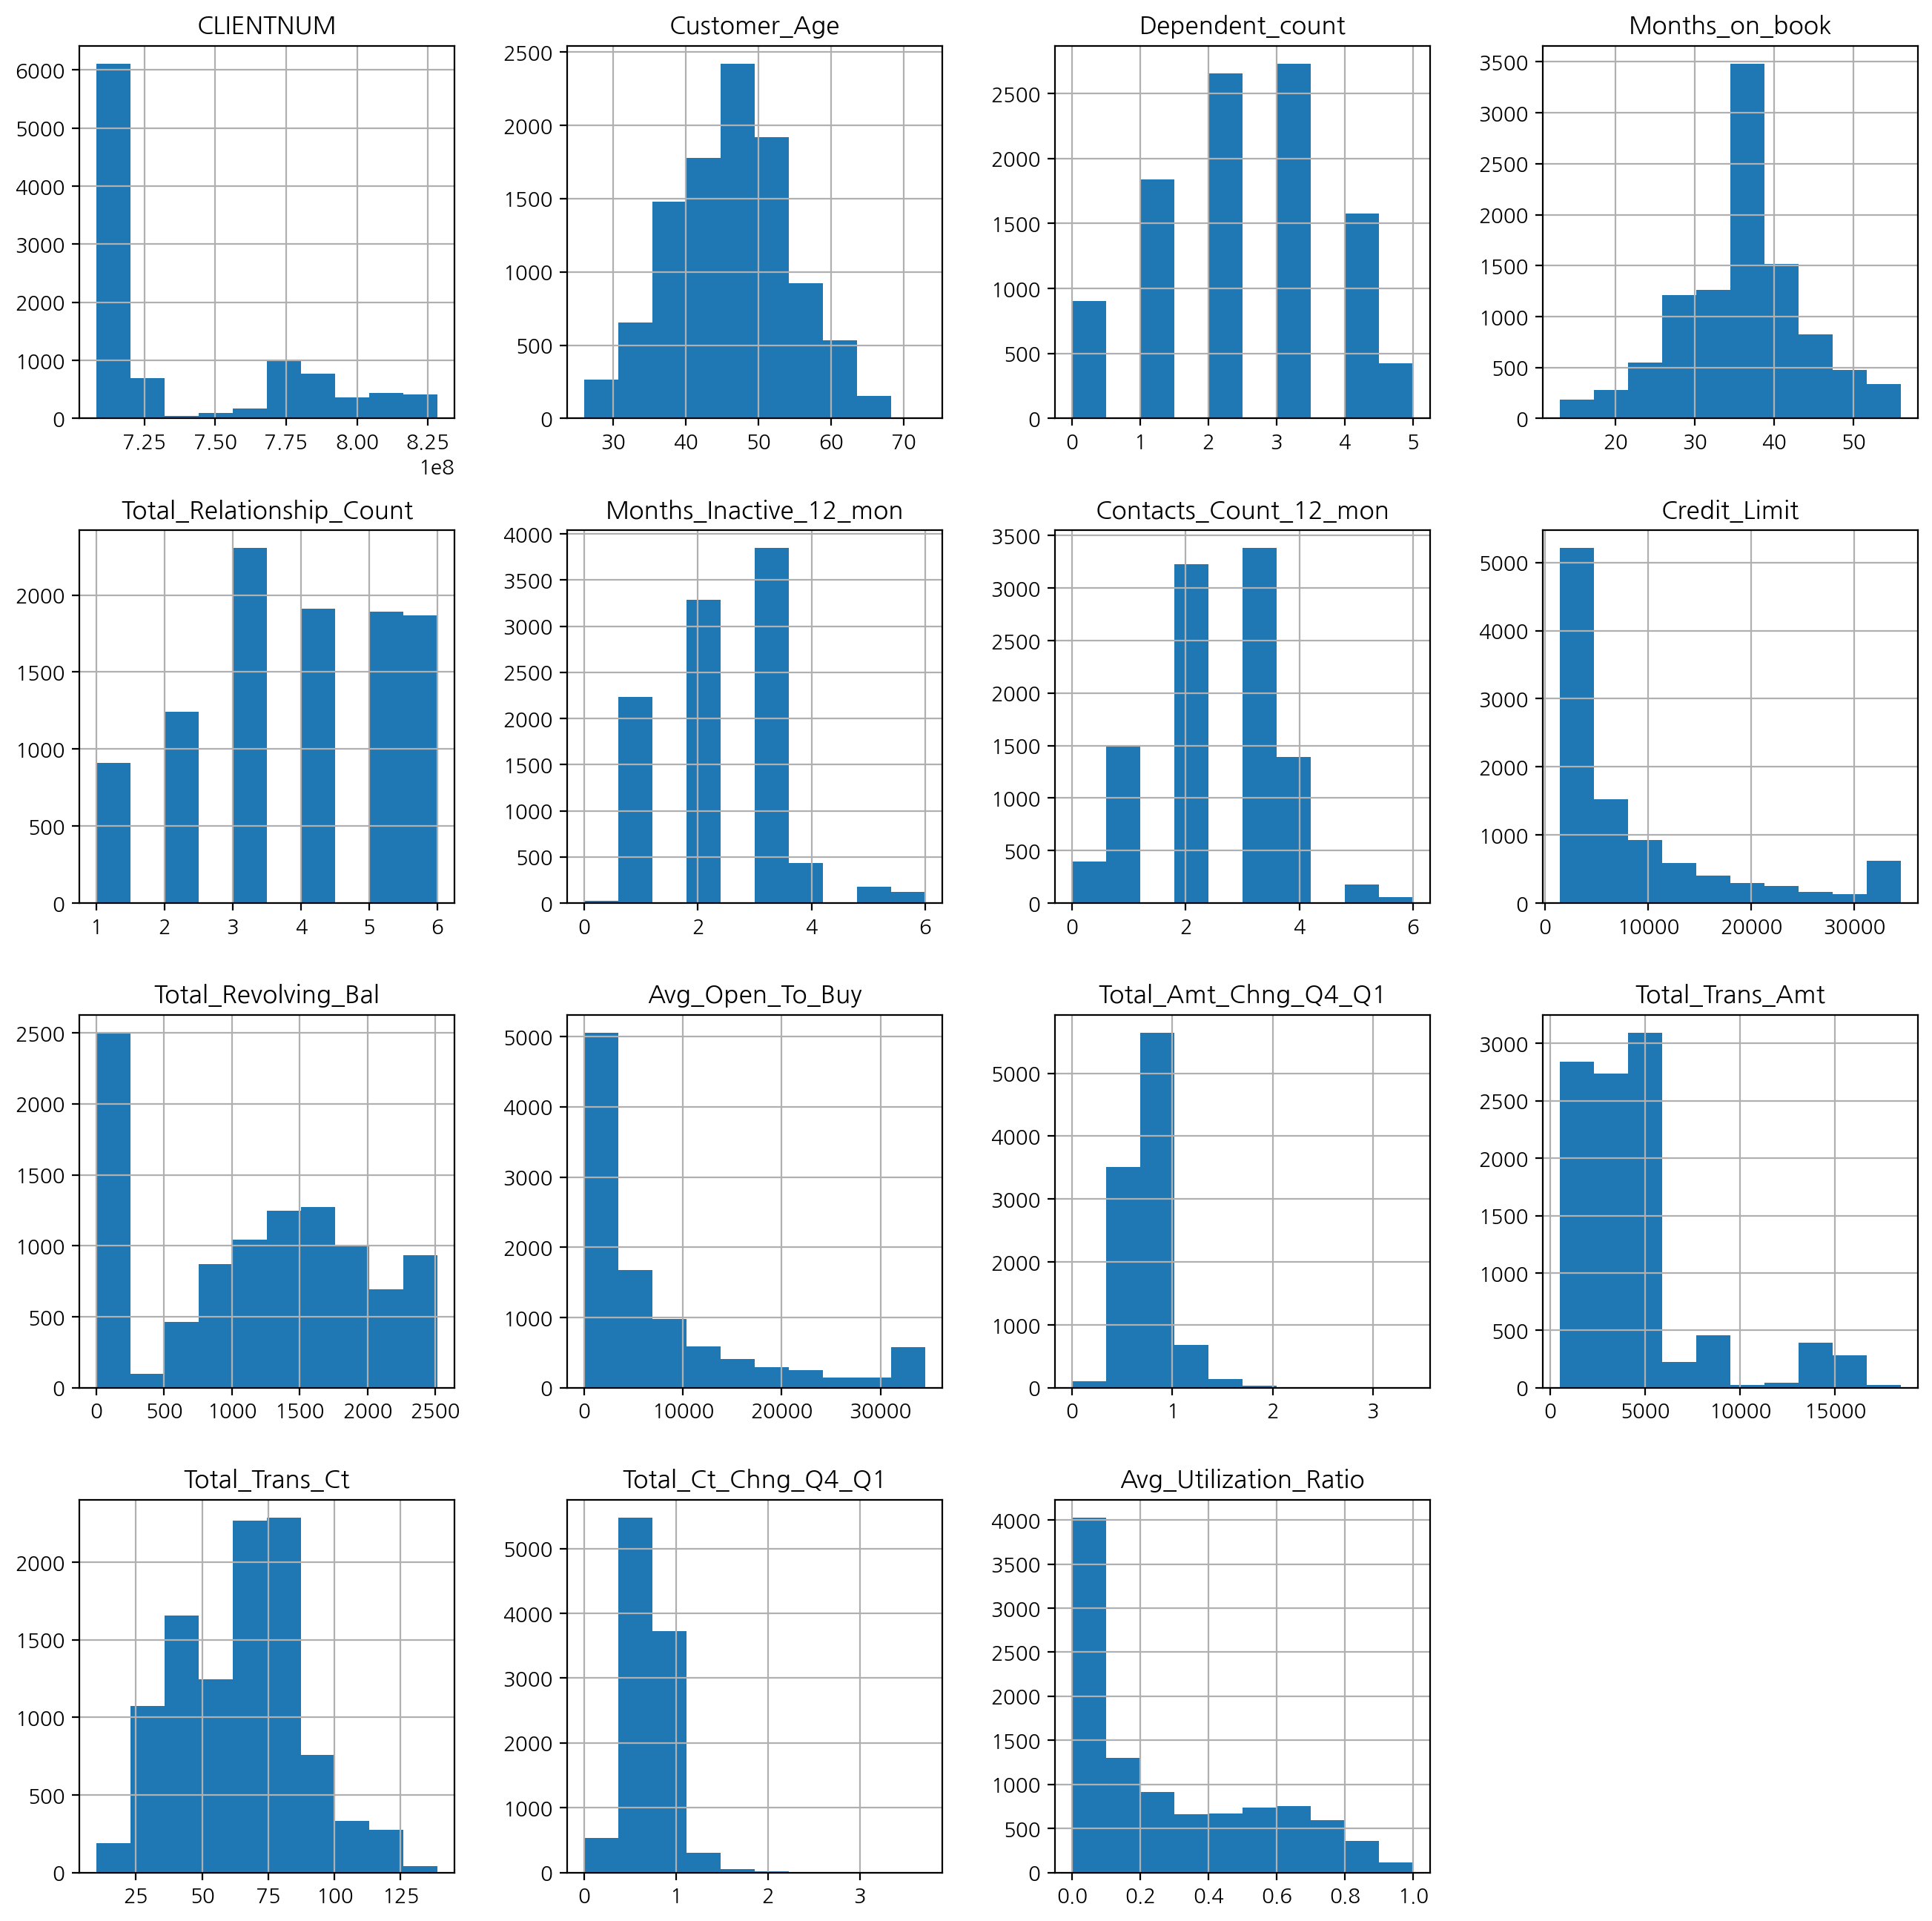

In [33]:
_ = df.hist(figsize=(16,16))

In [34]:
df.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2397,719233833,Existing Customer,35,F,3,High School,Married,Less than $40K,Blue,23,...,3,4,3073.0,526,2547.0,0.702,1944,55,0.618,0.171


# 상관관계 구하기

## 나이 -> 연령대로 변경

In [35]:
def ageCal(age):
    if age < 30 :
        return '20대'
    elif age < 40 :
        return '30대'
    elif age < 50 :
        return '40대'
    elif age < 60 :
        return '50대'
    elif age < 70 :
        return '60대'
    elif age < 80 :
        return '70대'

In [36]:
# '연령대' 컬럼 추가
df['ageCal'] = df['Customer_Age'].apply(ageCal)
df['ageCal']

0        40대
1        40대
2        50대
3        40대
4        40대
        ... 
10122    50대
10123    40대
10124    40대
10125    30대
10126    40대
Name: ageCal, Length: 10127, dtype: object

In [37]:
# # Label Encoding을 위한 함수 정의
# def label_encode_column(column):
#     le = LabelEncoder()
#     return le.fit_transform(column)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [39]:
# # 여러 컬럼에 대해 Label Encoding 수행
# columns_to_encode = ['Attrition_Flag', 'Gender', 
#                      'Card_Category', 'Education_Level', 'Income_Category', 'Marital_Status']

# for column in columns_to_encode:
#     df[column] = label_encode_column(df[column])

In [40]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,ageCal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,50대
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,40대
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40대
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,30대


## Label Encoding
- 레이블 인코딩은 범주형 데이터를 수치형으로 변환하는 방법
- 여러 범주(라벨)가 있는 컬럼에서 각 범주를 고유한 정수로 매핑하는 것이 핵심 아이디어

- 아래 코드에서 fit_transform 메서드는 레이블 인코딩을 수행
    - 인코딩된 값은 classes_ 속성에서 확인 가능
    - 이 코드에서는 'Category A'가 0, 'Category B'가 1, 'Category C'가 2로 인코딩

In [41]:
from sklearn.preprocessing import LabelEncoder

# 예시 데이터
data = ['Category A', 'Category B', 'Category C', 'Category A']

# LabelEncoder 객체 생성
le = LabelEncoder()

# 데이터에 대해 fit 및 transform 수행
encoded_data = le.fit_transform(data)

# 결과 출력
print("Original Data:", data)
print("Encoded Data:", encoded_data)


Original Data: ['Category A', 'Category B', 'Category C', 'Category A']
Encoded Data: [0 1 2 0]


In [42]:
# Label Encoding을 위한 함수 정의
def label_encode_column(column):
    le = LabelEncoder()
    encoded_column = le.fit_transform(column)
    encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return encoded_column, encoding_mapping

# 여러 컬럼에 대해 Label Encoding 수행
columns_to_encode = ['Attrition_Flag', 'Gender', 'ageCal',
                     'Card_Category', 'Education_Level', 'Income_Category', 'Marital_Status']

encoded_mapping_dict = {}
for column in columns_to_encode:
    df[column], encoding_mapping = label_encode_column(df[column])
    encoded_mapping_dict[column] = encoding_mapping

# 결과 출력
print("\n인코딩된 값 매핑:")
for column, mapping in encoded_mapping_dict.items():
    print(f"{column}: {mapping}\n")



인코딩된 값 매핑:
Attrition_Flag: {'Attrited Customer': 0, 'Existing Customer': 1}

Gender: {'F': 0, 'M': 1}

ageCal: {'20대': 0, '30대': 1, '40대': 2, '50대': 3, '60대': 4, '70대': 5}

Card_Category: {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}

Education_Level: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}

Income_Category: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}

Marital_Status: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}



## 상관관계 구하기

In [43]:
# 상관관계 행렬 구하기
correlation_matrix = df.corr()

<Axes: >

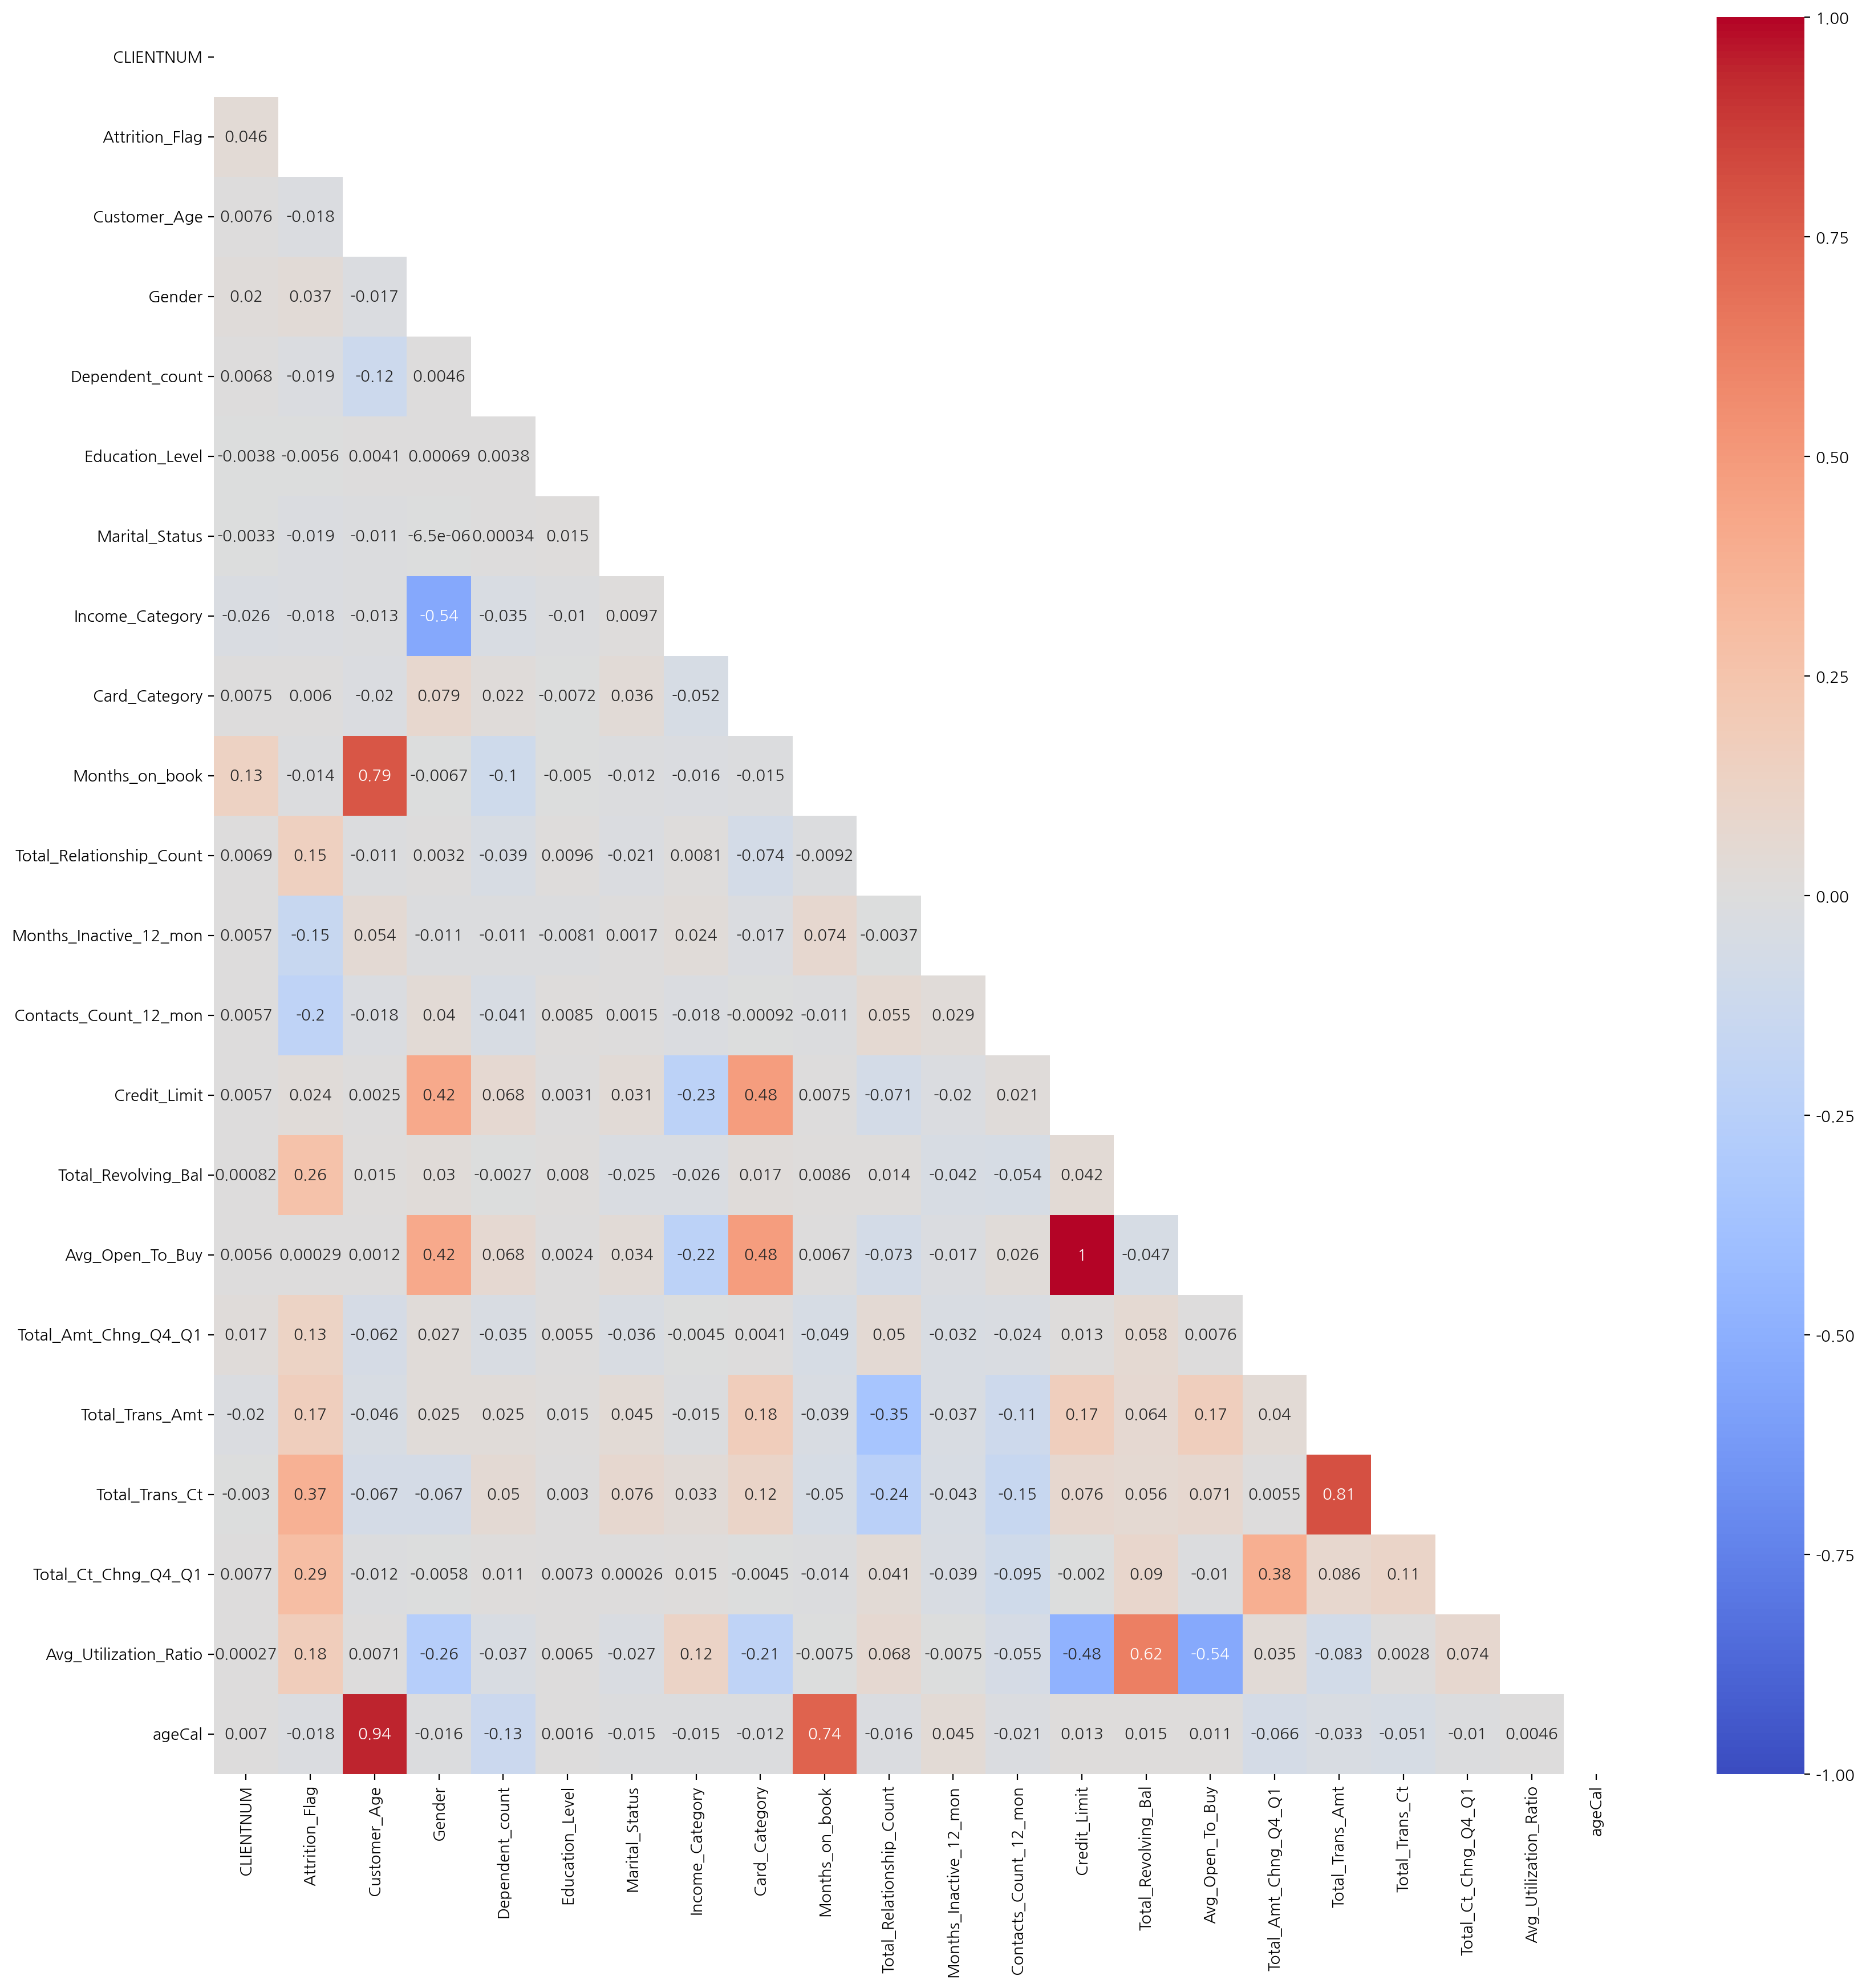

In [44]:
# 히트맵
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

In [45]:
# temp = correlation_matrix[(correlation_matrix >= 0.5) & (correlation_matrix != 1)]

In [46]:
# # NaN이 있는 행과 열 삭제
# temp = temp.dropna(axis=1, how = 'all').dropna(axis=0, how = 'all')

In [47]:
# 상관관계가 0.5 이상인 컬럼들을 찾기
high_correlation_columns = correlation_matrix[correlation_matrix.abs() >= 0.5]
high_correlation_columns = high_correlation_columns[high_correlation_columns <= -0.5]

# 상관관계가 0.5 이상인 컬럼들의 이름 출력
correlated_columns = []
for column in high_correlation_columns.columns:
    correlated_columns.extend(high_correlation_columns.index[high_correlation_columns[column].notna()].tolist())

correlated_columns = list(set(correlated_columns))  # 중복 제거

print("상관관계가 0.5 이상인 컬럼들:", correlated_columns)


상관관계가 0.5 이상인 컬럼들: ['Gender', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Income_Category']
